In [1]:
import pandas as pd

# File path
file_path = r"C:\Users\HP\OneDrive\Desktop\ml assignment\credit-card-dataset-for-clustering-main\P1G6_Set_1_dendi.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Display basic info
print(df.info())  # Check data types and missing values
print(df.head())  # Preview first few rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

C:\Users\HP\AppData\Local\Temp\ipykernel_19328\674400092.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
from sklearn.preprocessing import StandardScaler

# Drop customer ID
df_cleaned = df.drop(columns=["CUST_ID"])

# Fill missing values in MINIMUM_PAYMENTS with the median
df_cleaned = df_cleaned.copy()
df_cleaned["MINIMUM_PAYMENTS"] = df_cleaned["MINIMUM_PAYMENTS"].fillna(df_cleaned["MINIMUM_PAYMENTS"].median())

# Standardize the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Display the cleaned data
print(df_scaled.head())


    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.752660          -3.156788  -0.465215         -0.333508   
1 -0.754511          -3.681567  -0.401602         -0.254252   
2 -0.388665          -0.008117  -0.410646         -0.265521   
3 -0.626813          -2.107231   0.071244          0.334876   
4 -0.541840           0.516662  -0.195772          0.002196   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.462257     -0.477759            -0.907455   
1               -0.462257     -0.477759            -0.907455   
2               -0.462257     -0.477759            -0.907455   
3               -0.462257     -0.477759            -0.907455   
4               -0.462257     -0.477759            -0.907455   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.259253                         -0.915302   
1                   -0.259253                         -0.915302   
2                   -0.259253      

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist


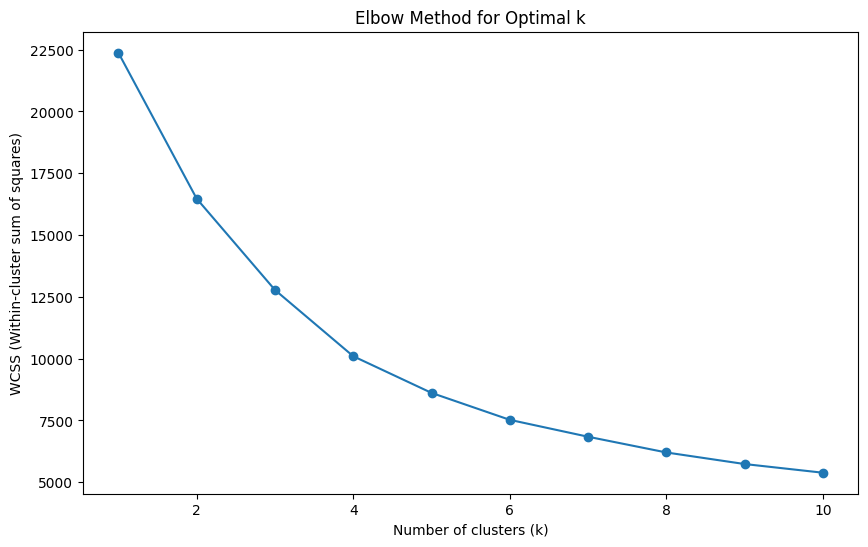

In [9]:
# Select the features to use for clustering (you can adjust this based on your focus)
features = df_cleaned[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'TENURE']]

# Standardize the data (important for K-Means)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):  # Testing for k=1 to k=10
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()



In [11]:
# Fit the K-Means model with k=4 (or the chosen k)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(features_scaled)

# Inspect the first few rows of the dataframe with the assigned cluster labels
df_cleaned.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,313.980229,0.0,8,3
1,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,313.980229,0.0,8,3
2,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8,3
3,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8,3
4,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8,3


In [23]:
# Ensure to select only the columns used for clustering (scaled features)
features_used_for_clustering = df_cleaned.drop('Cluster', axis=1).columns[:5]  # Adjust the number of features based on the actual clustering data

# Get the cluster centers and create a DataFrame
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=features_used_for_clustering)
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,1.259304,0.303197,1.291266,0.541434,0.265797
1,-0.356061,-0.165150,-0.355739,-0.224271,0.275100
2,1.298427,5.016823,2.117532,5.193464,0.329378
3,-0.290835,-0.263173,-0.525189,-0.376212,-3.084819


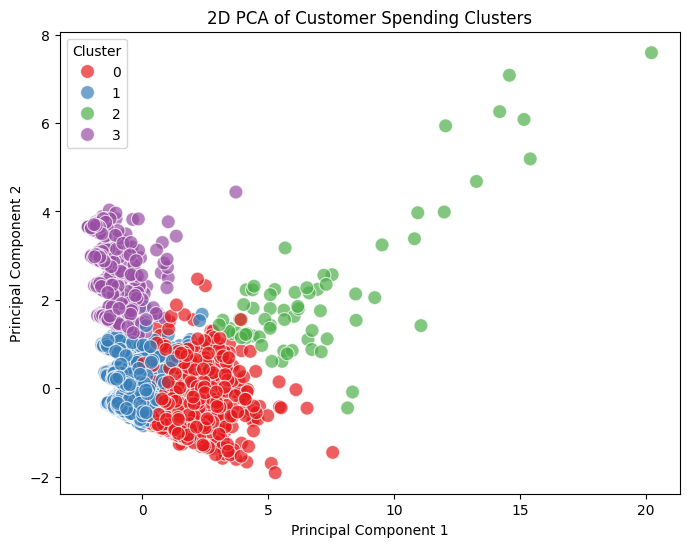

In [25]:
# Apply PCA to reduce to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df_cleaned['Cluster']

# Visualize the clusters
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)
plt.title("2D PCA of Customer Spending Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [35]:
# Label the clusters with descriptive names
cluster_labels = {
    0: 'High-Spending Customers',
    1: 'Moderate Customers',
    2: 'Heavy Purchasers',
    3: 'Conservative Customers'
}

df_cleaned['Cluster_Label'] = df_cleaned['Cluster'].map(cluster_labels)


In [37]:
# Count the number of customers in each cluster
cluster_distribution = df_cleaned['Cluster'].value_counts()
print(cluster_distribution)


Cluster
1    3140
0     902
3     365
2      68
Name: count, dtype: int64


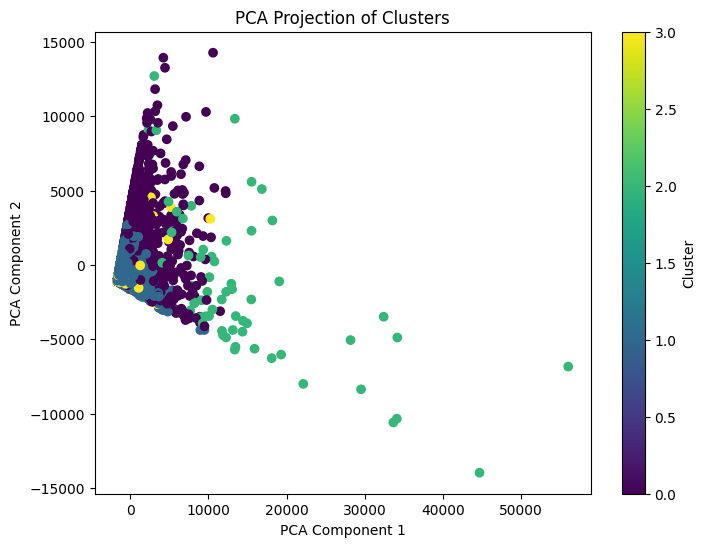

In [41]:

# Use PCA to reduce the features to 2 dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned[features_used_for_clustering])

# Create a scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_cleaned['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Projection of Clusters')
plt.show()


In [45]:

# Calculate silhouette score
sil_score = silhouette_score(df_cleaned[features_used_for_clustering], df_cleaned['Cluster'])
print(f'Silhouette Score: {sil_score}')


Silhouette Score: -0.0006329375816786073
